## Stationarity test for time series
Using non-stationary time series data in forecasting models produces unreliable and spurious results that leads to poor understanding and forecasting. The solution to the problem is to transform the time series data so that it becomes stationary. ADF and KPSS are quick stationary statistical tests to understand the data you are dealing with. 
Most statistical forecasting methods are based on the assumption that the time series are approximately stationary. A stationary series is relatively easy to predict: you simply forecast that its statistical properties will be the same in the future as they have been in the past. Analysis of time series patterns is the first step of converting non-stationary data in to stationary data (for example by trend removal), so that the statistical forecasting methods could be applied [1]. There are three fundamental steps of building a quality forecasting time series model: making the data stationary, selecting the right model, and evaluating model accuracy. This article will focus on the first step making the data stationarity.
Stationarity test
## Statistical tests 
do not tell you anything about the data investigated. It only makes assumptions, whether a null hypothesis is rejected or fail to be reject with a specified degree of certainty. Thus, the result must be interpreted for a given problem to be meaningful. Nevertheless, statistical tests can provide a quick test for time series stationary or non-stationary. Augmented Dickey-Fuller is one of the commonly used stationary tests.
## Augmented Dickey–Fuller test
An augmented Dickey–Fuller test tests the null hypothesis that a unit root is present in a time series data. Unit roots are a cause for non-stationarity, the ADF test will test if unit root is present. If the null hypothesis is rejected, then the alternate can be considered valid (e.g., the data is stationary) [2]. The ADF statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.
Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration[3].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
# use pandas library to read.csv file of featurs and stor in a dataframe object
Dataframe = pd.read_csv(r'BATS-BATS_GOOGL.csv', index_col = 'Date', parse_dates = True)

After downloading the dataset [4], import adfuller from statsmodels and specify the variable to analyse.

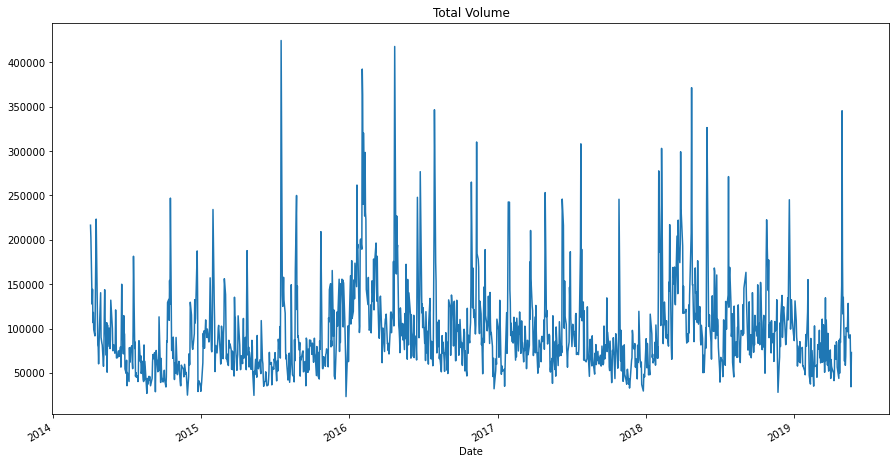

In [7]:
ax = plt.gca()
Dataframe['Total Volume'].plot(figsize=(15,8), title= 'Total Volume', ax=ax)
plt.show()

## Dickey-Fuller Test for Stationarity

The ADF value is the first value in the result and the p-value is the 2nd [3]. The '1%', '10%' and '5%' values are the critical values for 99%, 90% and 95% confidence levels.

In [8]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [9]:
adf_test = adfuller(Dataframe['Total Volume'])

In [10]:
adf_test

(-9.72732434430815,
 9.199902365205316e-17,
 4,
 1289,
 {'1%': -3.435433297366533,
  '5%': -2.863784847800804,
  '10%': -2.5679651739400224},
 30445.8406017294)

In this example we can see that the ADF value (the first value in the result) is -9.72) and the p-value (the 2nd value) is 9.2e^-17. ADF of less than the value of -3.435 suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and that the time series is stationary or does not have time-dependent structure.
Let as explore the following dataset[5]:

In [11]:
# use pandas library to read.csv file of featurs and stor in a dataframe object
Dataframe2 = pd.read_csv(r'sales-of-shampoo.csv', index_col = 'Month', parse_dates = True)
type(Dataframe2.index)

FileNotFoundError: [Errno 2] No such file or directory: 'sales-of-shampoo.csv'

In [ ]:
type(Dataframe2.index)

Adfuller does not work well with Nan values. I removed the Nan value row and renamed the column.

In [ ]:
# Removing Non
Dataframe2 = Dataframe2[:-1]
# Rename the column 
Dataframe2.columns = ['Sales_of_shampoo']

In [ ]:
ax = plt.gca()
Dataframe2['Sales_of_shampoo'].plot(figsize=(15,8), title= 'Sales of shampoo', ax=ax)
plt.show()

Obviously the dataset is non-stationary. Let us see the results of ADF test.

In [ ]:
print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))

In [ ]:
adf_test = adfuller(Dataframe2['Sales_of_shampoo'])

In [ ]:
adf_test

In this example we can see that the ADF is positive. There for, we can not reject the null hypothesis that a unit root is present in a time series data, and can assume our data is non-stationary.
## Summery
Using non-stationary time series data in forecasting models produces unreliable and spurious results that leads to poor understanding and forecasting. The solution to the problem is to transform the time series data so that it becomes stationary. ADF and KPSS are quick stationary statistical tests to understand the data you are dealing with. Unfortunately almost none of practical time series are stationary. There are ways to make time series stationary but it is almost impossible to make a series perfectly stationary, we can only try to take it as close as possible.